In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [7]:
# Function to load and preprocess images
def load_images(data_dir):
    X = []
    y = []
    label_encoder = LabelEncoder()
    for idx, celebrity_folder in enumerate(os.listdir(data_dir)):
        celebrity_path = os.path.join(data_dir, celebrity_folder)
        if os.path.isdir(celebrity_path):
            for img_file in os.listdir(celebrity_path):
                img_path = os.path.join(celebrity_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                X.append(img)
                y.append(idx)  # Assigning numerical labels
    X = np.array(X)
    y = label_encoder.fit_transform(y)
    return X, y

# Path to the folder containing celebrity images
data_dir = r"C:\Users\ADHISH S\Desktop\Notes\Notes_Sem_3\DEEP_LEARNING\Assignments\C_image_clasiification\Dataset_Celebrities\cropped"

# Load and preprocess images
X, y = load_images(data_dir)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(set(y)), activation='softmax') 
])

In [9]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/25
5/5 [==============================] - 2s 53ms/step - loss: 1491.5818 - accuracy: 0.2463 - val_loss: 1408.5042 - val_accuracy: 0.2059
Epoch 2/25
5/5 [==============================] - 0s 31ms/step - loss: 771.3504 - accuracy: 0.2313 - val_loss: 249.6946 - val_accuracy: 0.2353
Epoch 3/25
5/5 [==============================] - 0s 27ms/step - loss: 370.1588 - accuracy: 0.1642 - val_loss: 49.6642 - val_accuracy: 0.2353
Epoch 4/25
5/5 [==============================] - 0s 28ms/step - loss: 69.3367 - accuracy: 0.2687 - val_loss: 22.7644 - val_accuracy: 0.4706
Epoch 5/25
5/5 [==============================] - 0s 29ms/step - loss: 26.6990 - accuracy: 0.3582 - val_loss: 14.9570 - val_accuracy: 0.3235
Epoch 6/25
5/5 [==============================] - 0s 29ms/step - loss: 7.7089 - accuracy: 0.5373 - val_loss: 6.6615 - val_accuracy: 0.5000
Epoch 7/25
5/5 [==============================] - 0s 28ms/step - loss: 2.2060 - accuracy: 0.6716 - val_loss: 4.7004 - val_accuracy: 0.5588
Epoch 8/25

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 0s 0s/step - loss: 4.3036 - accuracy: 0.5882
Validation accuracy: 58.82%


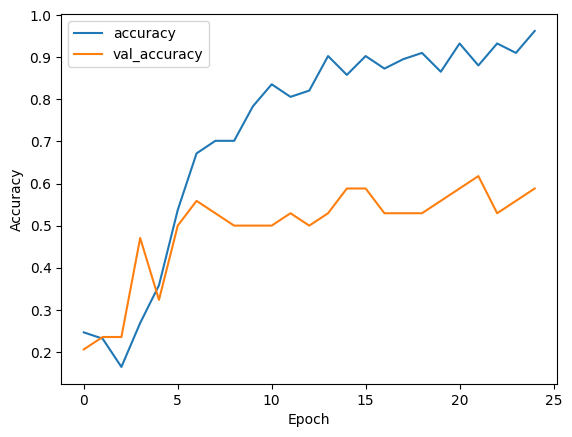

In [13]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

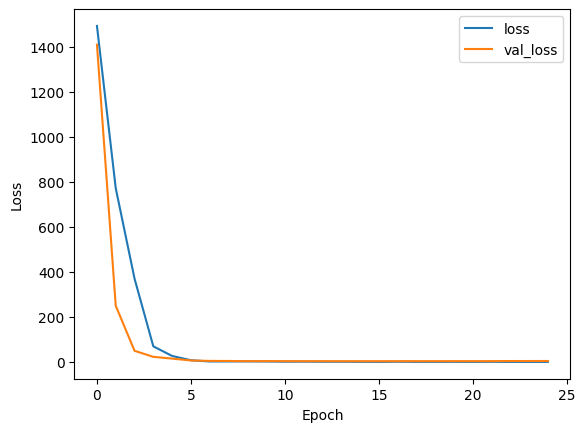

In [14]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Loss and Accuracy Trends:

    Loss Trend:
        The loss reduces consistently over epochs for both training and validation sets. This indicates that the model is learning and improving its predictions.

    Accuracy Trend:
        The accuracy fluctuates but generally increases over epochs on the training set.
        On the validation set, the accuracy also shows some fluctuation but seems to reach a plateau after around 10 epochs.

2/2 [==============================] - 0s 784us/step


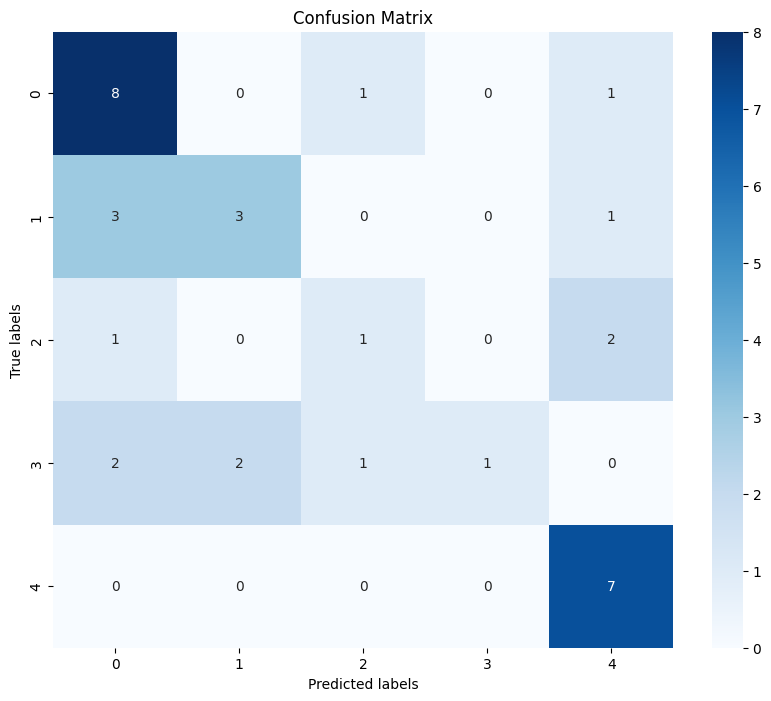

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(len(set(y))), yticklabels=range(len(set(y))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Save the model
model.save('my_celebrity_classifier_model.h5')


Model Architecture

In [16]:
# Load the saved model
saved_model = tf.keras.models.load_model('my_celebrity_classifier_model.h5')

# Display the model architecture
saved_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                        

Prediction

In [4]:
import numpy as np
import cv2
import tensorflow as tf

# Function to preprocess a single image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize the image to match the input shape of the model
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load the saved model
saved_model_path = 'my_celebrity_classifier_model.h5'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Function to predict the celebrity from an image
def predict_celebrity(image_path, model):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the predicted class
    return predicted_class

# Example usage: Predicting a celebrity from a new image
image_to_predict_path = r'C:\Users\ADHISH S\Desktop\Notes\Notes_Sem_3\DEEP_LEARNING\Assignments\C_image_clasiification\Dataset_Celebrities\cropped\serena_williams\serena_williams17.png'
predicted_class_index = predict_celebrity(image_to_predict_path, loaded_model)

celebrity_names = ['Lionel Messi', 'Maria Sharapova', 'Roger Federer','Serena Williams','Virat Kohli']  
predicted_celebrity = celebrity_names[predicted_class_index]

print("Predicted Celebrity:", predicted_celebrity)


1/1 [==============================] - 0s 72ms/step
Predicted Celebrity: Serena Williams
